In [ ]:
import numpy as np   
import pandas as pd
from datetime import datetime

In [9]:
import pandas as pd
import matplotlib.pylab as plt
import datetime as dt
import torch
from sklearn.metrics import accuracy_score

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
from google.colab import drive

In [12]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/MyDrive/indexData.csv')

In [14]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [15]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [16]:
df.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [17]:
df["Date"]

0         1965-12-31
1         1966-01-03
2         1966-01-04
3         1966-01-05
4         1966-01-06
             ...    
112452    2021-05-27
112453    2021-05-28
112454    2021-05-31
112455    2021-06-01
112456    2021-06-02
Name: Date, Length: 112457, dtype: object

In [18]:
df["Date"] = pd.to_datetime(df["Date"])

In [19]:
df["Date"]

0        1965-12-31
1        1966-01-03
2        1966-01-04
3        1966-01-05
4        1966-01-06
            ...    
112452   2021-05-27
112453   2021-05-28
112454   2021-05-31
112455   2021-06-01
112456   2021-06-02
Name: Date, Length: 112457, dtype: datetime64[ns]

In [20]:
df["Index"].isin(['NYA'])

0          True
1          True
2          True
3          True
4          True
          ...  
112452    False
112453    False
112454    False
112455    False
112456    False
Name: Index, Length: 112457, dtype: bool

In [21]:
df[df["Index"].isin(['NYA'])]## select True role from table

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [22]:
df_NYA = df[df["Index"].isin(['NYA'])].sort_values('Date')

In [23]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


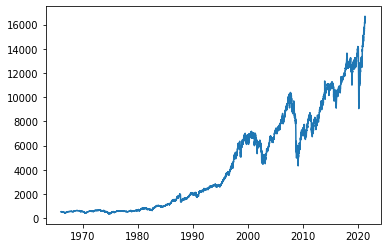

In [24]:
plt.plot(df_NYA["Date"],df_NYA["High"],label='Row Data') 

In [25]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [26]:
df_NYA_Date_High = df_NYA[["Date","High"]]

In [27]:
df_NYA_Date_High

,Date,High
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16508.519530
13944,2021-05-25,16525.810550
13945,2021-05-26,16466.339840
13946,2021-05-27,16546.359380


In [28]:
df_NYA_Date_High.isnull().sum() #find out the null value in date and close 

Date    0
High    1
dtype: int64

In [29]:
np.where(df_NYA_Date_High["High"].isnull())[0] #find the index of close NaN 

array([289])

In [30]:
type(df_NYA_Date_High)

pandas.core.frame.DataFrame

In [31]:
df_NYA_Date_High.iloc[[289]]

,Date,High
289,1967-02-23,NaN


In [32]:
df_NYA_Date_High_withoutnan = df_NYA_Date_High.dropna()

In [33]:
df_NYA_Date_High_withoutnan.isnull().sum()

Date    0
High    0
dtype: int64

In [34]:
df_NYA_Date_High_withoutnan

,Date,High
0,1965-12-31,528.690002
1,1966-01-03,527.210022
2,1966-01-04,527.840027
3,1966-01-05,531.119995
4,1966-01-06,532.070007
...,...,...
13943,2021-05-24,16508.519530
13944,2021-05-25,16525.810550
13945,2021-05-26,16466.339840
13946,2021-05-27,16546.359380


In [35]:
data_train = df_NYA_Date_High_withoutnan[df_NYA_Date_High_withoutnan.Date < "2010-01-01" ] #  data < df_NYA_data_close before 2010-01-01 is used for training
data_test  = df_NYA_Date_High_withoutnan[df_NYA_Date_High_withoutnan.Date >= "2010-01-01"] #  data >= 2010-01-01 of df_NYA_data_close used for test

In [38]:
data_train.Date[:,np.newaxis]

<ipython-input-38-b7b7fc843d80>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_train.Date[:,np.newaxis]


array([['1965-12-31T00:00:00.000000000'],
       ['1966-01-03T00:00:00.000000000'],
       ['1966-01-04T00:00:00.000000000'],
       ...,
       ['2009-12-29T00:00:00.000000000'],
       ['2009-12-30T00:00:00.000000000'],
       ['2009-12-31T00:00:00.000000000']], dtype='datetime64[ns]')

In [39]:
X_train = data_train.Date[:,np.newaxis]
y_train = data_train.High

<ipython-input-39-66e3813889c2>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.Date[:,np.newaxis]


In [40]:
X_train_fix=[]
for i in range(len(X_train)):
  X_train_fix.append(X_train[i].astype(datetime))

In [41]:
linear_reg = LinearRegression().fit(X_train_fix, y_train) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:964: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(


In [42]:
X_test = data_test.Date[:,np.newaxis]
y_test = data_test.High

<ipython-input-42-11216da55ee3>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = data_test.Date[:,np.newaxis]


In [43]:
X_test_fix = []
for i in range(len(X_test)):
  X_test_fix.append(X_test[i].astype(datetime))

In [44]:
y_pred = linear_reg.predict(X_test_fix)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [46]:
score = r2_score(y_test,y_pred)
print(mean_squared_error(y_test, y_pred))
print(score)


8346503.097625212
-0.7099033452067525


In [47]:
# From the result of r2 score, which is a negative value, we can see that model does not a good job.
# the mean_squared_error is very large, which means the model does a bad predication.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
from sklearn.linear_model import Lasso

In [50]:
model_lasso = Lasso(alpha=1)

In [51]:
model_lasso.fit(X_train_fix, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.095e+09, tolerance: 8.297e+06
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [52]:
y_predict_lasso = model_lasso.predict(X_test_fix)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [53]:
y_test

11077     7331.120117
11078     7359.459961
11079     7389.279785
11080     7398.209961
11081     7426.410156
             ...     
13943    16508.519530
13944    16525.810550
13945    16466.339840
13946    16546.359380
13947    16588.689450
Name: High, Length: 2871, dtype: float64

In [54]:
y_predict_lasso

array([7130.02802592, 7130.5584783 , 7131.08893068, ..., 9336.70992454,
       9337.24037692, 9337.7708293 ])

In [55]:
print(np.sqrt(mean_squared_error(y_test,y_predict_lasso)))
print(r2_score(y_test, y_predict_lasso))
# mean_squared_error is 2889.0315155126327
# r2_score is -0.7099033452067538
# mean_squared_error is very large, and r2_score is a negative value, both of them mean the model does a pretty bad predication.

2889.0315155126327
-0.7099033452067538


In [56]:
#The linear regression give result:
8274805.87149229 #mean_squred_error
-0.6974082783962985 #r2_score
#The Lasso regression give result:
2889.0315155126327 #mean_squred_error
-0.7099033452067538 #r2_score

-0.7099033452067538

In [57]:
# From the result, we can find out that the linear regression and Lasson regression give the same r2_score, both are negative, means the model did a bad job.
# For mean_squared_error, Lasso regression give a lower score, which means that lasso regression did a better job.  

In [58]:
df_NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [59]:
df_NYA.isnull().sum()

Index        0
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [60]:
df_NYA_WithoutNull=df_NYA.dropna()

In [61]:
df_NYA_WithoutNull.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [62]:
df_high = df_NYA_WithoutNull.High

In [63]:
df_NYA_WithoutNull

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [64]:
#df_NYA_WithoutNull_withoutHigh = df_NYA_WithoutNull.drop(['High'],axis=1)

In [65]:
df_NYA_WithoutNull_withoutIndex = df_NYA_WithoutNull.drop(['Index'],axis=1)

In [66]:
data_train = df_NYA_WithoutNull_withoutIndex[df_NYA_WithoutNull_withoutIndex.Date < "2010-01-01"]
data_test  = df_NYA_WithoutNull_withoutIndex[df_NYA_WithoutNull_withoutIndex.Date >="2010-01-01"]

In [67]:
data_train.Date=pd.to_datetime(data_train.Date).astype(np.int64)

<ipython-input-67-bc0350d3da3b>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data_train.Date=pd.to_datetime(data_train.Date).astype(np.int64)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [68]:
data_test.Date=pd.to_datetime(data_test.Date).astype(np.int64)

<ipython-input-68-09476f36109d>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data_test.Date=pd.to_datetime(data_test.Date).astype(np.int64)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [69]:
data_train = data_train.dropna()

In [70]:
data_test = data_test.dropna()

In [71]:
data_train_target = data_train.High

In [72]:
data_train_withoutHigh = data_train.drop(['High'],axis=1)

In [73]:
data_test_target= data_test.High

In [74]:
data_test_withoutHigh = data_test.drop(['High'],axis=1)

In [75]:
linear_reg_mutiple_variable_model = LinearRegression().fit(data_train_withoutHigh, data_train_target) 

In [76]:
lasson_reg_mutiple_variable_model = model_lasso.fit(data_train_withoutHigh,data_train_target)

In [77]:
data_test_predict = linear_reg_mutiple_variable_model.predict(data_test_withoutHigh)

In [78]:
data_test_predict_lasson = lasson_reg_mutiple_variable_model.predict(data_test_withoutHigh)

In [79]:
print(mean_squared_error(data_test_target, data_test_predict))
score = r2_score(data_test_target, data_test_predict)
print(score)

2429.1898727539547
0.9995023448933067


In [80]:
print(mean_squared_error(data_test_target, data_test_predict_lasson))
score = r2_score(data_test_target, data_test_predict_lasson)
print(score)

2952.2144815184743
0.9993951956455689


In [82]:
import pandas as pd


In [83]:
from sklearn.feature_selection import SelectKBest, f_regression

In [84]:
selector = SelectKBest(f_regression, k=3)

In [85]:
data_train_withoutHigh

,Date,Open,Low,Close,Adj Close,Volume
0,-126316800000000000,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,-126057600000000000,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,-125971200000000000,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,-125884800000000000,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,-125798400000000000,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...
11072,1261612800000000000,7217.049805,7217.049805,7255.000000,7255.000000,1.267710e+09
11073,1261958400000000000,7255.000000,7240.160156,7261.240234,7261.240234,2.716400e+09
11074,1262044800000000000,7261.299805,7250.509766,7252.189941,7252.189941,2.491020e+09
11075,1262131200000000000,7252.169922,7209.430176,7241.240234,7241.240234,2.277300e+09


In [86]:
type(data_train_withoutHigh.columns)

pandas.core.indexes.base.Index

In [87]:
data_train_target

0         528.690002
1         527.210022
2         527.840027
3         531.119995
4         532.070007
            ...     
11072    7256.870117
11073    7282.990234
11074    7288.229980
11075    7252.169922
11076    7258.750000
Name: High, Length: 11076, dtype: float64

In [88]:
X_new = selector.fit_transform(data_train_withoutHigh, data_train_target)

In [89]:
selector.get_support()

array([False,  True, False,  True,  True, False])

In [90]:
data_test_withoutHigh = data_test_withoutHigh[["Open","Close","Adj Close"]]

In [91]:
mask = selector.get_support()
new_features = []
for bool, feature in zip(mask, data_train_withoutHigh.columns):
  if bool:
    new_features.append(feature)

In [92]:
new_features

['Open', 'Close', 'Adj Close']

In [93]:
X_new

array([[ 528.690002,  528.690002,  528.690002],
       [ 527.210022,  527.210022,  527.210022],
       [ 527.840027,  527.840027,  527.840027],
       ...,
       [7261.299805, 7252.189941, 7252.189941],
       [7252.169922, 7241.240234, 7241.240234],
       [7241.25    , 7184.959961, 7184.959961]])

In [94]:
data_train_new = pd.DataFrame(X_new, columns=new_features)

In [95]:
linear_reg_mutiple_variable_model_after_selectK = LinearRegression().fit(data_train_new, data_train_target) 

In [96]:
model_lasso = Lasso(alpha=1)

In [97]:
lasson_reg_mutiple_variable_model_after_selectK = model_lasso.fit(data_train_new, data_train_target)

In [98]:
data_test_withoutHigh

,Open,Close,Adj Close
11077,7184.979980,7326.740234,7326.740234
11078,7326.740234,7354.870117,7354.870117
11079,7354.850098,7377.700195,7377.700195
11080,7377.700195,7393.930176,7393.930176
11081,7393.930176,7425.350098,7425.350098
...,...,...,...
13943,16375.000000,16464.689450,16464.689450
13944,16464.689450,16390.189450,16390.189450
13945,16390.189450,16451.960940,16451.960940
13946,16451.960940,16531.949220,16531.949220


In [99]:
y_pred_after_select = linear_reg_mutiple_variable_model_after_selectK.predict(data_test_withoutHigh) # Now, we have the predication from the 3 features selected from 6 features.

In [100]:
y_predict_lasso_after_select = lasson_reg_mutiple_variable_model_after_selectK.predict(data_test_withoutHigh)

In [101]:
print(mean_squared_error(data_test_target, y_pred_after_select))
score = r2_score(data_test_target, y_pred_after_select)
print(score)

1948.1970216272161
0.9996008833201835


In [102]:
print(mean_squared_error(data_test_target, y_predict_lasso_after_select))
score = r2_score(data_test_target, y_predict_lasso_after_select)
print(score)

3355.425642022033
0.9993125919366737
